# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### Importing the training set

In [2]:
dataset_train = pd.read_csv('BTC_Train.csv')
training_set = dataset_train.iloc[:, 5].values #training_set = dataset_train.iloc[:, 1:2].values

#https://www.datacamp.com/tutorial/moving-averages-in-pandas
dataset_train['EMA5'] = dataset_train.iloc[:,5].ewm(span=5,adjust=False).mean()
dataset_train['EMA10'] = dataset_train.iloc[:,5].ewm(span=10,adjust=False).mean()
dataset_train['EMA21'] = dataset_train.iloc[:,5].ewm(span=21,adjust=False).mean()
dataset_train['EMA50'] = dataset_train.iloc[:,5].ewm(span=50,adjust=False).mean()
dataset_train['EMA200'] = dataset_train.iloc[:,5].ewm(span=200,adjust=False).mean()

x_train_5MA =   dataset_train['EMA5'].values
x_train_10MA =  dataset_train['EMA10'].values
x_train_21MA =  dataset_train['EMA21'].values
x_train_50MA =  dataset_train['EMA50'].values
x_train_200MA = dataset_train['EMA200'].values


### Feature Scaling

In [3]:
training_set = training_set.reshape(-1,1)
x_train_5MA = x_train_5MA.reshape(-1,1)
x_train_10MA = x_train_10MA.reshape(-1,1)
x_train_21MA = x_train_21MA.reshape(-1,1)
x_train_50MA = x_train_50MA.reshape(-1,1)
x_train_200MA = x_train_200MA.reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

sc5 = MinMaxScaler(feature_range = (0, 1))
x_train_5MA_scaled = sc5.fit_transform(x_train_5MA)
sc10 = MinMaxScaler(feature_range = (0, 1))
x_train_10MA_scaled = sc10.fit_transform(x_train_10MA)
sc21 = MinMaxScaler(feature_range = (0, 1))
x_train_21MA_scaled = sc21.fit_transform(x_train_21MA)
sc50 = MinMaxScaler(feature_range = (0, 1))
x_train_50MA_scaled = sc50.fit_transform(x_train_50MA)
sc200 = MinMaxScaler(feature_range = (0, 1))
x_train_200MA_scaled = sc200.fit_transform(x_train_200MA)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
Y_train = []


for i in range(20,  2449):

  X_train_joined = np.concatenate((training_set_scaled[i-20:i],x_train_5MA_scaled[i-20:i],x_train_10MA_scaled[i-20:i], x_train_21MA_scaled[i-20:i], x_train_50MA_scaled[i-20:i], x_train_200MA_scaled[i-20:i]), dtype=None)
  X_train.append(X_train_joined)
  Y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train, dtype=object), np.array(Y_train)

### Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#X_train.shape

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [7]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.25))

#X_train.shape

### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(Dropout(0.4))

### Adding a third and fourth LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(Dropout(0.4))

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.25))

### Adding the output layer

In [12]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [15]:
X_train = np.asarray(X_train).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/10
76/76 [==============================] - 40s 432ms/step - loss: 0.0065
Epoch 2/10
76/76 [==============================] - 26s 348ms/step - loss: 0.0028
Epoch 3/10
76/76 [==============================] - 26s 347ms/step - loss: 0.0024
Epoch 4/10
76/76 [==============================] - 27s 353ms/step - loss: 0.0034
Epoch 5/10
76/76 [==============================] - 27s 360ms/step - loss: 0.0020
Epoch 6/10
76/76 [==============================] - 26s 345ms/step - loss: 0.0024
Epoch 7/10
76/76 [==============================] - 28s 363ms/step - loss: 0.0021
Epoch 8/10
76/76 [==============================] - 26s 342ms/step - loss: 0.0022
Epoch 9/10
76/76 [==============================] - 26s 348ms/step - loss: 0.0020
Epoch 10/10
76/76 [==============================] - 26s 341ms/step - loss: 0.0020


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [16]:
dataset_test = pd.read_csv('BTC_Test.csv', engine='python')
real_stock_price = dataset_test.iloc[:, 5].values

### Getting the predicted stock price of 2017

In [17]:
dataset_total = pd.concat((dataset_train['Adj Close'], dataset_test['Adj Close']), axis = 0)
dataset_frame_total = dataset_total.to_frame().T
dataset_frame_total = dataset_frame_total.T


dataset_frame_total['EMA5'] = dataset_frame_total.iloc[:, 0].ewm(span=5,adjust=False).mean()
dataset_frame_total['EMA10'] = dataset_frame_total.iloc[:, 0].ewm(span=10,adjust=False).mean()
dataset_frame_total['EMA21'] = dataset_frame_total.iloc[:, 0].ewm(span=21,adjust=False).mean()
dataset_frame_total['EMA50'] = dataset_frame_total.iloc[:, 0].ewm(span=50,adjust=False).mean()
dataset_frame_total['EMA200'] = dataset_frame_total.iloc[:, 0].ewm(span=200,adjust=False).mean()

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 20:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

x_test_5MA =  dataset_frame_total['EMA5'][len(dataset_frame_total) - len(dataset_test) - 20:].values
x_test_5MA = x_test_5MA.reshape(-1,1)
x_test_5MA = sc5.transform(x_test_5MA)


x_test_10MA =  dataset_frame_total['EMA10'][len(dataset_frame_total) - len(dataset_test) - 20:].values
x_test_10MA = x_test_10MA.reshape(-1,1)
x_test_10MA = sc10.transform(x_test_10MA)

x_test_21MA =  dataset_frame_total['EMA21'][len(dataset_frame_total) - len(dataset_test) - 20:].values
x_test_21MA = x_test_21MA.reshape(-1,1)
x_test_21MA = sc21.transform(x_test_21MA)

x_test_50MA =  dataset_frame_total['EMA50'][len(dataset_frame_total) - len(dataset_test) - 20:].values
x_test_50MA = x_test_50MA.reshape(-1,1)
x_test_50MA = sc50.transform(x_test_50MA)

x_test_200MA =  dataset_frame_total['EMA200'][len(dataset_frame_total) - len(dataset_test) - 20:].values
x_test_200MA = x_test_200MA.reshape(-1,1)
x_test_200MA = sc200.transform(x_test_200MA)


X_test = []
for i in range(20, 599):
    X_test_joined = np.concatenate((inputs[i-20:i],x_test_5MA[i-20:i],x_test_10MA[i-20:i], x_test_21MA[i-20:i], x_test_50MA[i-20:i], x_test_200MA[i-20:i]), dtype=None)
    X_test.append(X_test_joined)

X_test = np.array(X_test, dtype=object) #List to Array

#X_test = np.stack(X_test)


X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test = np.asarray(X_test).astype('float32')

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

19/19 [==============================] - 5s 106ms/step


### Visualising the results

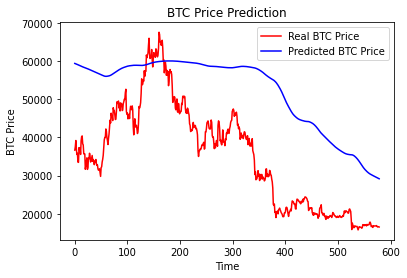

In [18]:
plt.plot(real_stock_price, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.legend()
plt.show()